In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = "../resources/2019data.csv"
nypd_data = pd.read_csv(data, parse_dates=["ARREST_DATE"])
nypd_data.shape

(213810, 5)

In [3]:
nypd_data.dtypes

ARREST_DATE    datetime64[ns]
PD_CD                 float64
PD_DESC                object
OFNS_DESC              object
AGE_GROUP              object
dtype: object

In [4]:
nypd_data.head()

,ARREST_DATE,PD_CD,PD_DESC,OFNS_DESC,AGE_GROUP
0,2019-01-02,114.0,OBSTR BREATH/CIRCUL,ASSAULT 3 & RELATED OFFENSES,25-44
1,2019-01-02,101.0,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44
2,2019-01-02,494.0,"STOLEN PROPERTY 2,1,POSSESSION",POSSESSION OF STOLEN PROPERTY,25-44
3,2019-01-02,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",OTHER TRAFFIC INFRACTION,18-24
4,2019-01-02,49.0,U.S. CODE UNCLASSIFIED,FOR OTHER AUTHORITIES,25-44


In [5]:
march_data = nypd_data.loc[(nypd_data["ARREST_DATE"] > "03/01/2019") & (nypd_data["ARREST_DATE"] < "04/01/2019"), :]
march_data.head()

,ARREST_DATE,PD_CD,PD_DESC,OFNS_DESC,AGE_GROUP
37915,2019-03-02,201.0,"TRESPASS 4,CRIMINAL SUB 2",MISCELLANEOUS PENAL LAW,45-64
37916,2019-03-02,478.0,"THEFT OF SERVICES, UNCLASSIFIE",OTHER OFFENSES RELATED TO THEF,25-44
37917,2019-03-02,101.0,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,18-24
37918,2019-03-02,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",FORGERY,25-44
37919,2019-03-02,566.0,"MARIJUANA, POSSESSION",MISCELLANEOUS PENAL LAW,25-44


In [6]:
march_age_18_24 = march_data.loc[(march_data["AGE_GROUP"] == "18-24"), :]
march_age_18_24.head(10)

,ARREST_DATE,PD_CD,PD_DESC,OFNS_DESC,AGE_GROUP
37917,2019-03-02,101.0,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,18-24
37920,2019-03-02,101.0,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,18-24
37932,2019-03-02,510.0,"CONTROLLED SUBSTANCE, INTENT T",DANGEROUS DRUGS,18-24
37934,2019-03-02,779.0,"PUBLIC ADMINISTRATION,UNCLASSI",MISCELLANEOUS PENAL LAW,18-24
37946,2019-03-02,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",FORGERY,18-24
37947,2019-03-02,569.0,"MARIJUANA, SALE 4 & 5",DANGEROUS DRUGS,18-24
37948,2019-03-02,793.0,WEAPONS POSSESSION 3,DANGEROUS WEAPONS,18-24
37952,2019-03-02,569.0,"MARIJUANA, SALE 4 & 5",DANGEROUS DRUGS,18-24
37957,2019-03-02,779.0,"PUBLIC ADMINISTRATION,UNCLASSI",MISCELLANEOUS PENAL LAW,18-24
37959,2019-03-02,113.0,"MENACING,UNCLASSIFIED",ASSAULT 3 & RELATED OFFENSES,18-24


In [32]:
group_ofns = march_age_18_24.groupby("OFNS_DESC")
count_ofns = group_ofns["OFNS_DESC"].count().sort_values(ascending=False).head(10)
count_ofns

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES      526
DANGEROUS DRUGS                   334
PETIT LARCENY                     275
VEHICLE AND TRAFFIC LAWS          271
FELONY ASSAULT                    259
DANGEROUS WEAPONS                 247
CRIMINAL MISCHIEF & RELATED OF    203
MISCELLANEOUS PENAL LAW           189
GRAND LARCENY                     178
ROBBERY                           161
Name: OFNS_DESC, dtype: int64

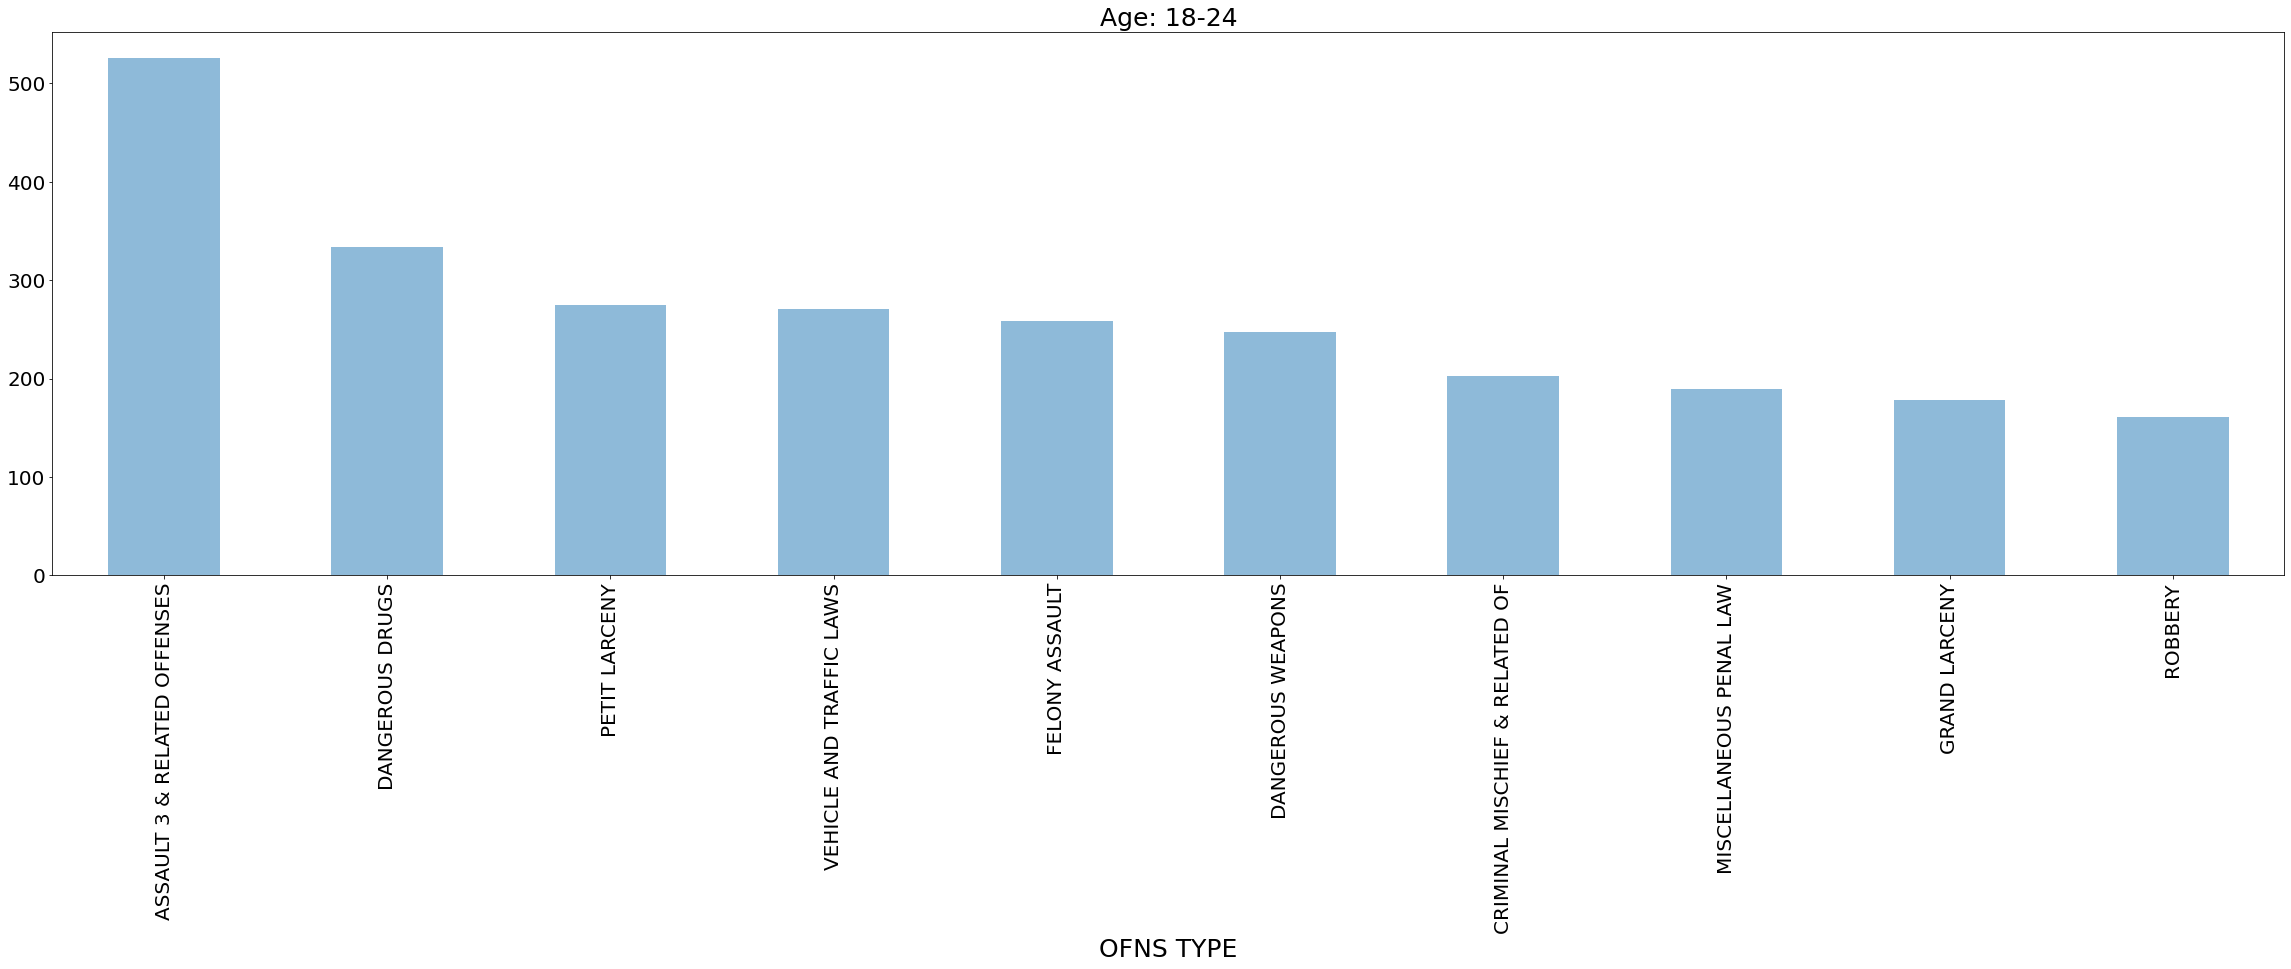

In [39]:
plt.figure(figsize=(40,10))

ofns_chart_18_24m = count_ofns.plot(kind="bar", alpha=0.5, fontsize=20)
plt.title("Age: 18-24", fontsize=25)
plt.xlabel("OFNS TYPE", fontsize=25)



plt.show()

In [34]:
march_age_25_44 = march_data.loc[(march_data["AGE_GROUP"] == "25-44"), :]
group_ofns_25_44 = march_age_25_44.groupby("OFNS_DESC")
count_ofns_25_44 = group_ofns_25_44["OFNS_DESC"].count().sort_values(ascending=False).head(10)
count_ofns_25_44

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES      1403
DANGEROUS DRUGS                   1100
VEHICLE AND TRAFFIC LAWS           925
PETIT LARCENY                      818
FELONY ASSAULT                     686
MISCELLANEOUS PENAL LAW            638
CRIMINAL MISCHIEF & RELATED OF     510
GRAND LARCENY                      480
DANGEROUS WEAPONS                  373
OFFENSES AGAINST PUBLIC ADMINI     351
Name: OFNS_DESC, dtype: int64

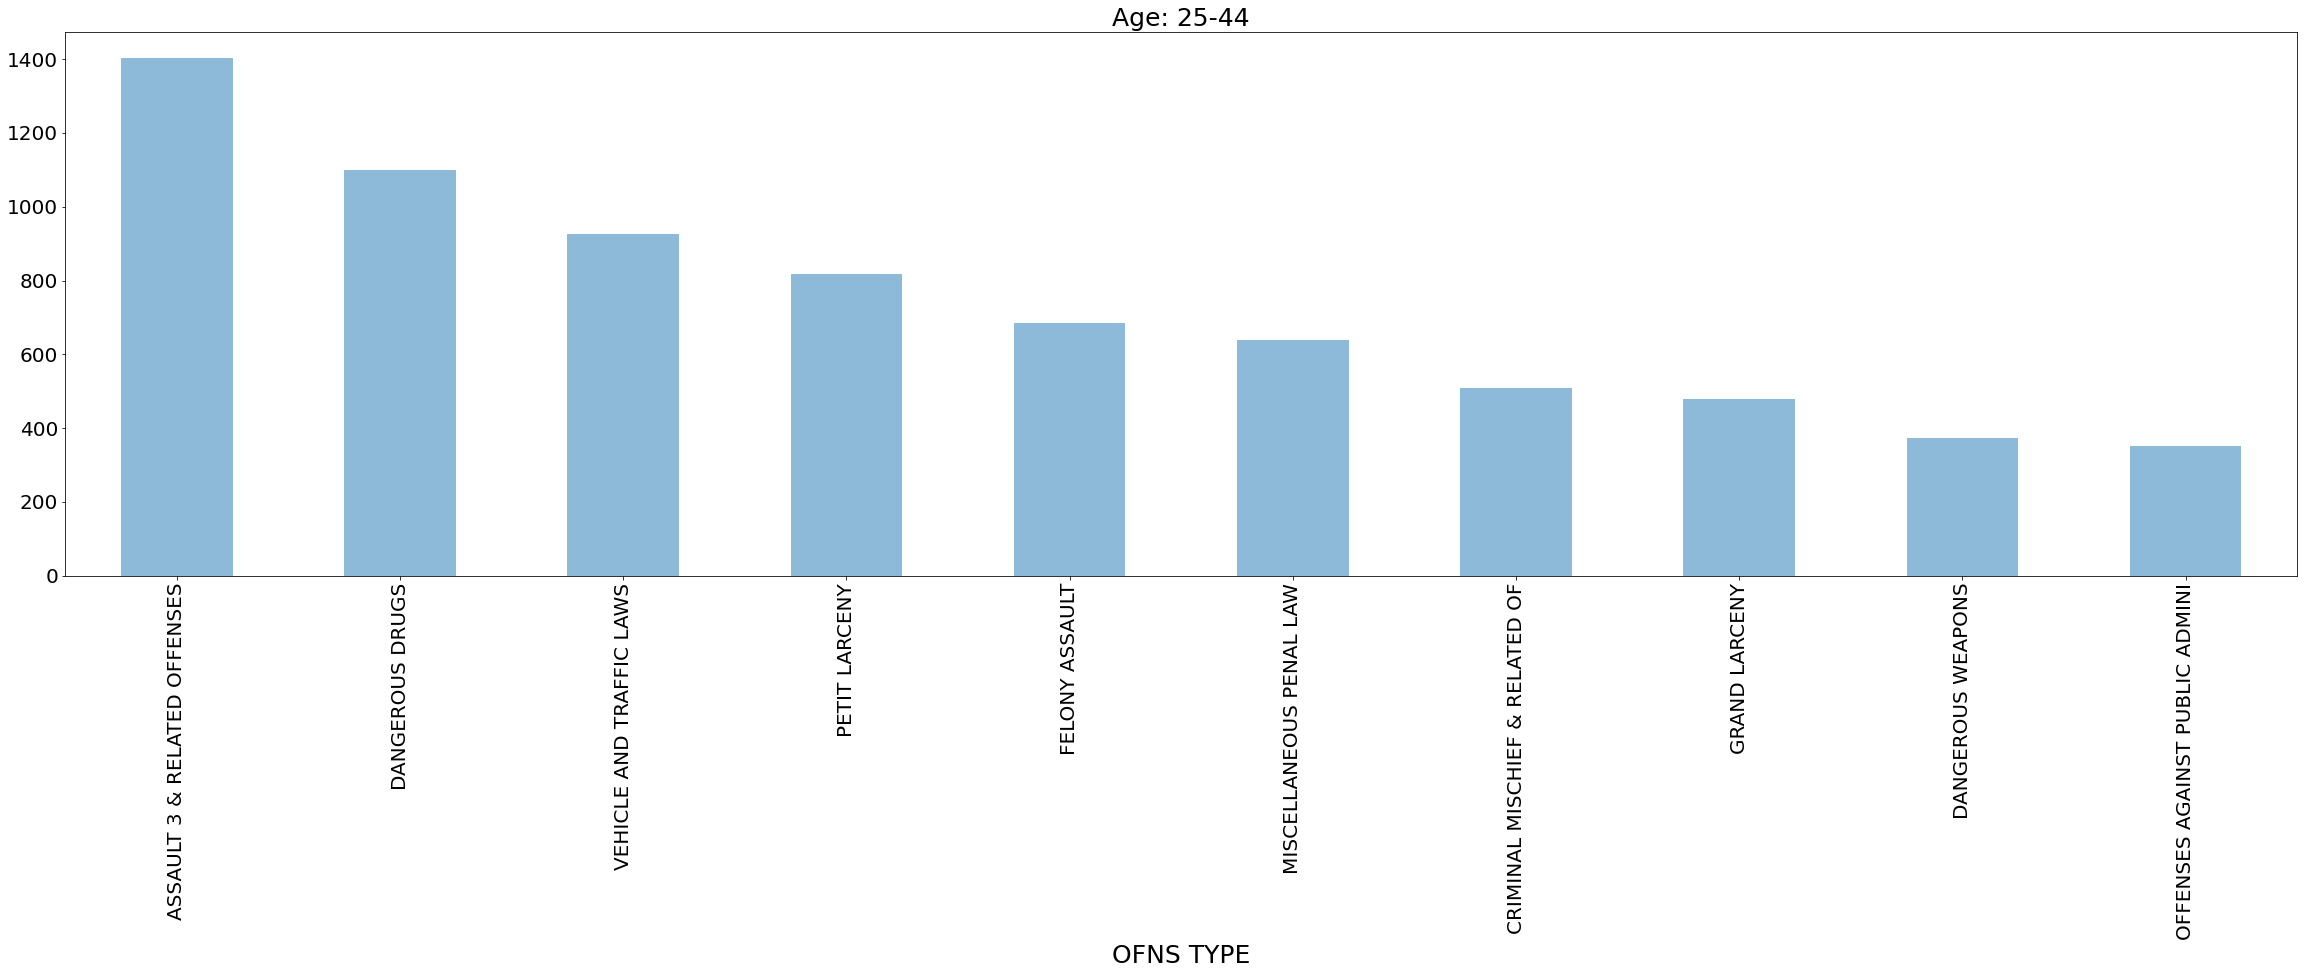

In [40]:
plt.figure(figsize=(40,10))

ofns_chart_24_44m = count_ofns_25_44.plot(kind="bar", alpha=0.5, fontsize=20)
plt.title("Age: 25-44", fontsize=25)
plt.xlabel("OFNS TYPE", fontsize=25)



plt.show()